# Técnicas Avançadas de Captura e Tratamento de Dados

**Fernando Pereira dos Santos**

**Semana 7: Dados não estruturados (imagens) **

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from scipy import ndimage
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

#Links importantes:
# http://scipy-lectures.org/advanced/image_processing/
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

print("Lendo MNIST dataset")
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()
print(Xtrain.shape)
print(Xtest.shape)

Lendo MNIST dataset
(60000, 28, 28)
(10000, 28, 28)


# **Pré-processamento para imagens**

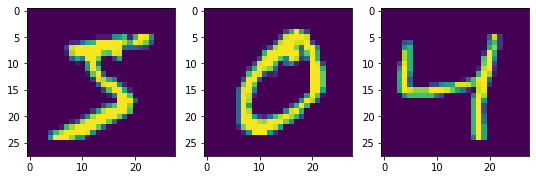

In [2]:
img1 = Image.fromarray(Xtrain[0])
img2 = Image.fromarray(Xtrain[1])
img3 = Image.fromarray(Xtrain[2])

plt.figure(figsize=(9,3))
plt.subplot(131); plt.imshow(img1);
plt.subplot(132); plt.imshow(img2);
plt.subplot(133); plt.imshow(img3);

**Filtro da Média:**  O resultado de um pixel central é a média de seus vizinhos com. Exemplo:

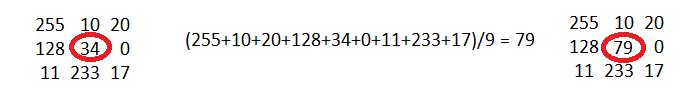




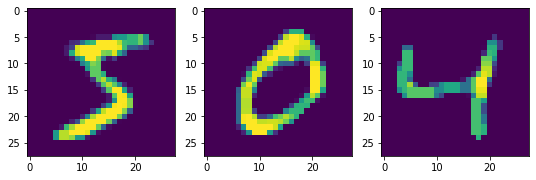

In [3]:
img_median1 = ndimage.median_filter(img1, 3)
img_median2 = ndimage.median_filter(img2, 3)
img_median3 = ndimage.median_filter(img3, 3)

plt.figure(figsize=(9,3))
plt.subplot(131); plt.imshow(img_median1);
plt.subplot(132); plt.imshow(img_median2);
plt.subplot(133); plt.imshow(img_median3);

**Morfologia Matemática:** proporciona operações matemáticas de erosão, dilatação, entre outros

Erosão: possibilita remover espaços pequenos demais

Dilatação: possibilita aumentar espaços pequenos



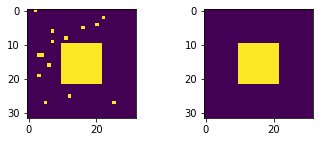

In [4]:
square = np.zeros((32, 32))
square[10:-10, 10:-10] = 1
np.random.seed(2)
x, y = (32*np.random.random((2, 20))).astype(np.int)
square[x, y] = 1

eroded_square = ndimage.binary_erosion(square)
reconstruction = ndimage.binary_propagation(eroded_square, mask=square)

plt.figure(figsize=(9,2))
plt.subplot(131); plt.imshow(square);
plt.subplot(132); plt.imshow(reconstruction);

# Data augmentation

Possibilita aumentar a variedade de um conjunto de imagens inicial. Assim, como os rótulos se mantem os mesmos, aumentamos o conjunto de treinamento sem a necessidade de rotular novos exemplos.

É necessário ter cuidado: por exemplo, dígitos 6 e 9 se rotacionados alteram sua classe original.

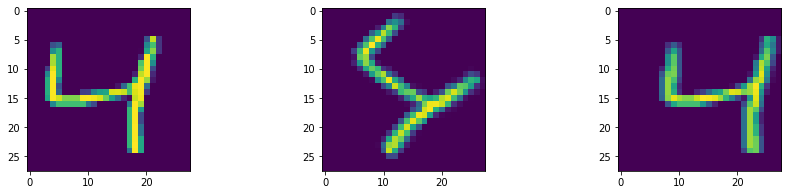

In [5]:
imgOriginal = np.reshape(Xtrain[2],(28,28,1))

datagen = ImageDataGenerator(rotation_range=45)
it = datagen.flow(np.expand_dims(imgOriginal, 0), batch_size=1)
batch = it.next()

img_rotacionada = np.array(batch[0].astype(np.uint8))
img_rotacionada = np.reshape(img_rotacionada,(28,28))

datagen = ImageDataGenerator(width_shift_range=0.5)
it = datagen.flow(np.expand_dims(imgOriginal, 0), batch_size=1)
batch = it.next()

img_shift = np.array(batch[0].astype(np.uint8))
img_shift = np.reshape(img_shift,(28,28))

plt.figure(figsize=(15,3))
plt.subplot(131); plt.imshow(img3);
plt.subplot(132); plt.imshow(img_rotacionada);
plt.subplot(133); plt.imshow(img_shift);